<a href="https://colab.research.google.com/github/chimaOkwuokei/machine-learning-projects/blob/main/face_recognition_of_classmates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition
!pip install opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=8b41051c0b60fb6a3409a7cbcfe60312409c23de9cb2a6ed2fe4efa90e2c7471
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Result:  [True]


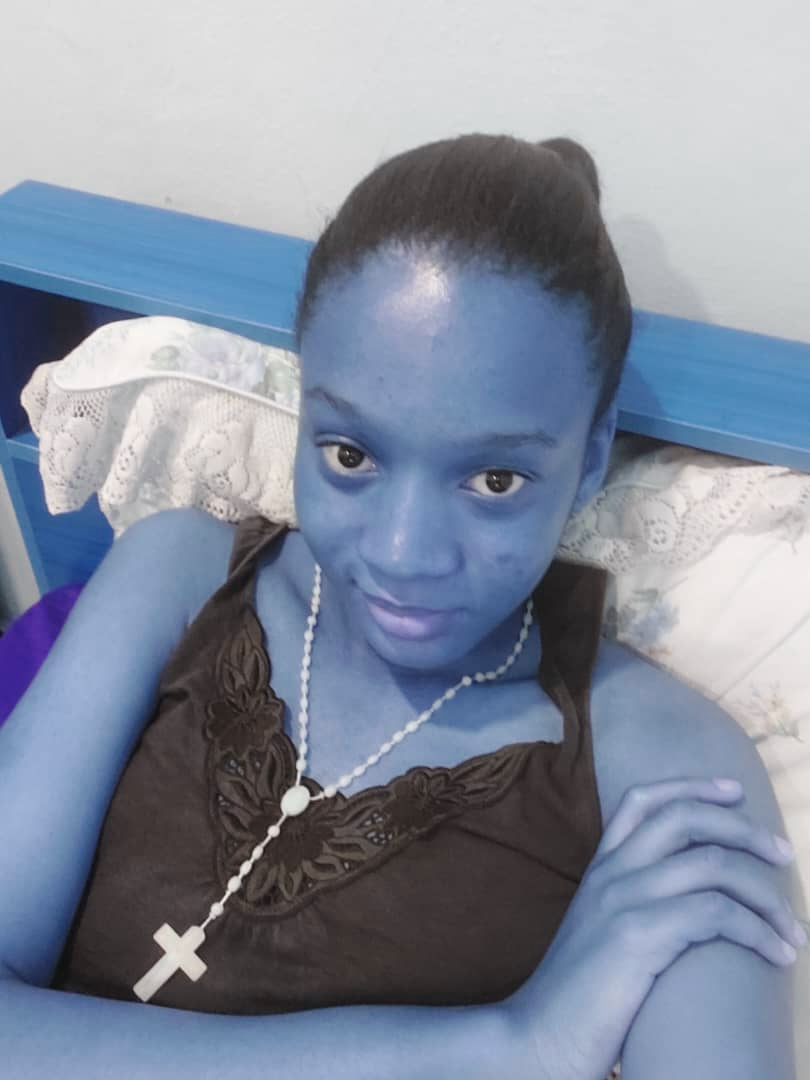

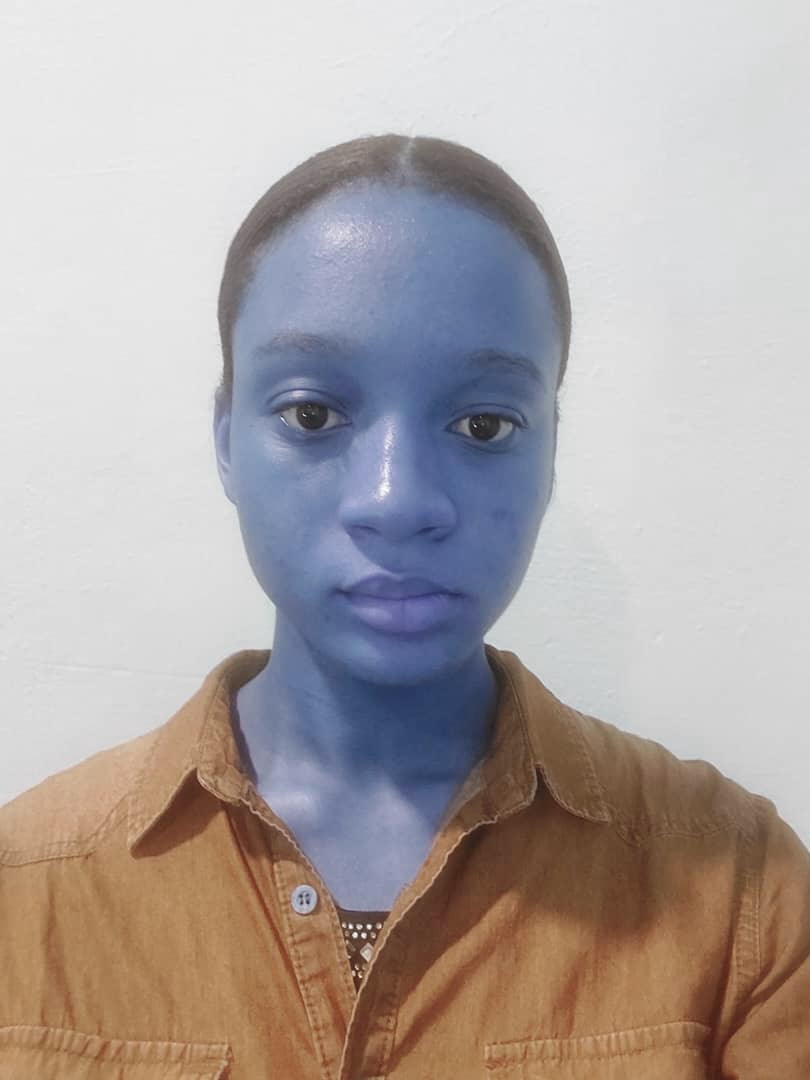

In [18]:
#the images get encoded
import cv2
import face_recognition as fr
from google.colab.patches import cv2_imshow

# Load the image from the specified path (assuming "/contents/dumebi.jpeg" is correct)
img = cv2.imread("/content/dumebi.jpeg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_encoding = fr.face_encodings(rgb_img)[0]

# Load the image from the specified path (assuming "/contents/dumebi.jpeg" is correct)
img2 = cv2.imread("/content/dum2.jpeg")
rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_encoding = fr.face_encodings(rgb_img2)[0]

#compares encoding's to see if they're the same persons

result = fr.compare_faces([img_encoding], img2_encoding)
print("Result: ", result)
# Check if image loading was successful
if img2 is not None:
  # Display the image using cv2_imshow for Colab compatibility
  cv2_imshow(rgb_img)
  cv2_imshow(rgb_img2)

  # Wait for a key press to close the window (optional)
  cv2.waitKey(0)

  # Close all open windows
  cv2.destroyAllWindows()
else:
  print("Error: Image could not be loaded. Please check the path and file existence.")


In [20]:
!pip install simple_facerec

ERROR: Could not find a version that satisfies the requirement simple_facerec (from versions: none)
ERROR: No matching distribution found for simple_facerec


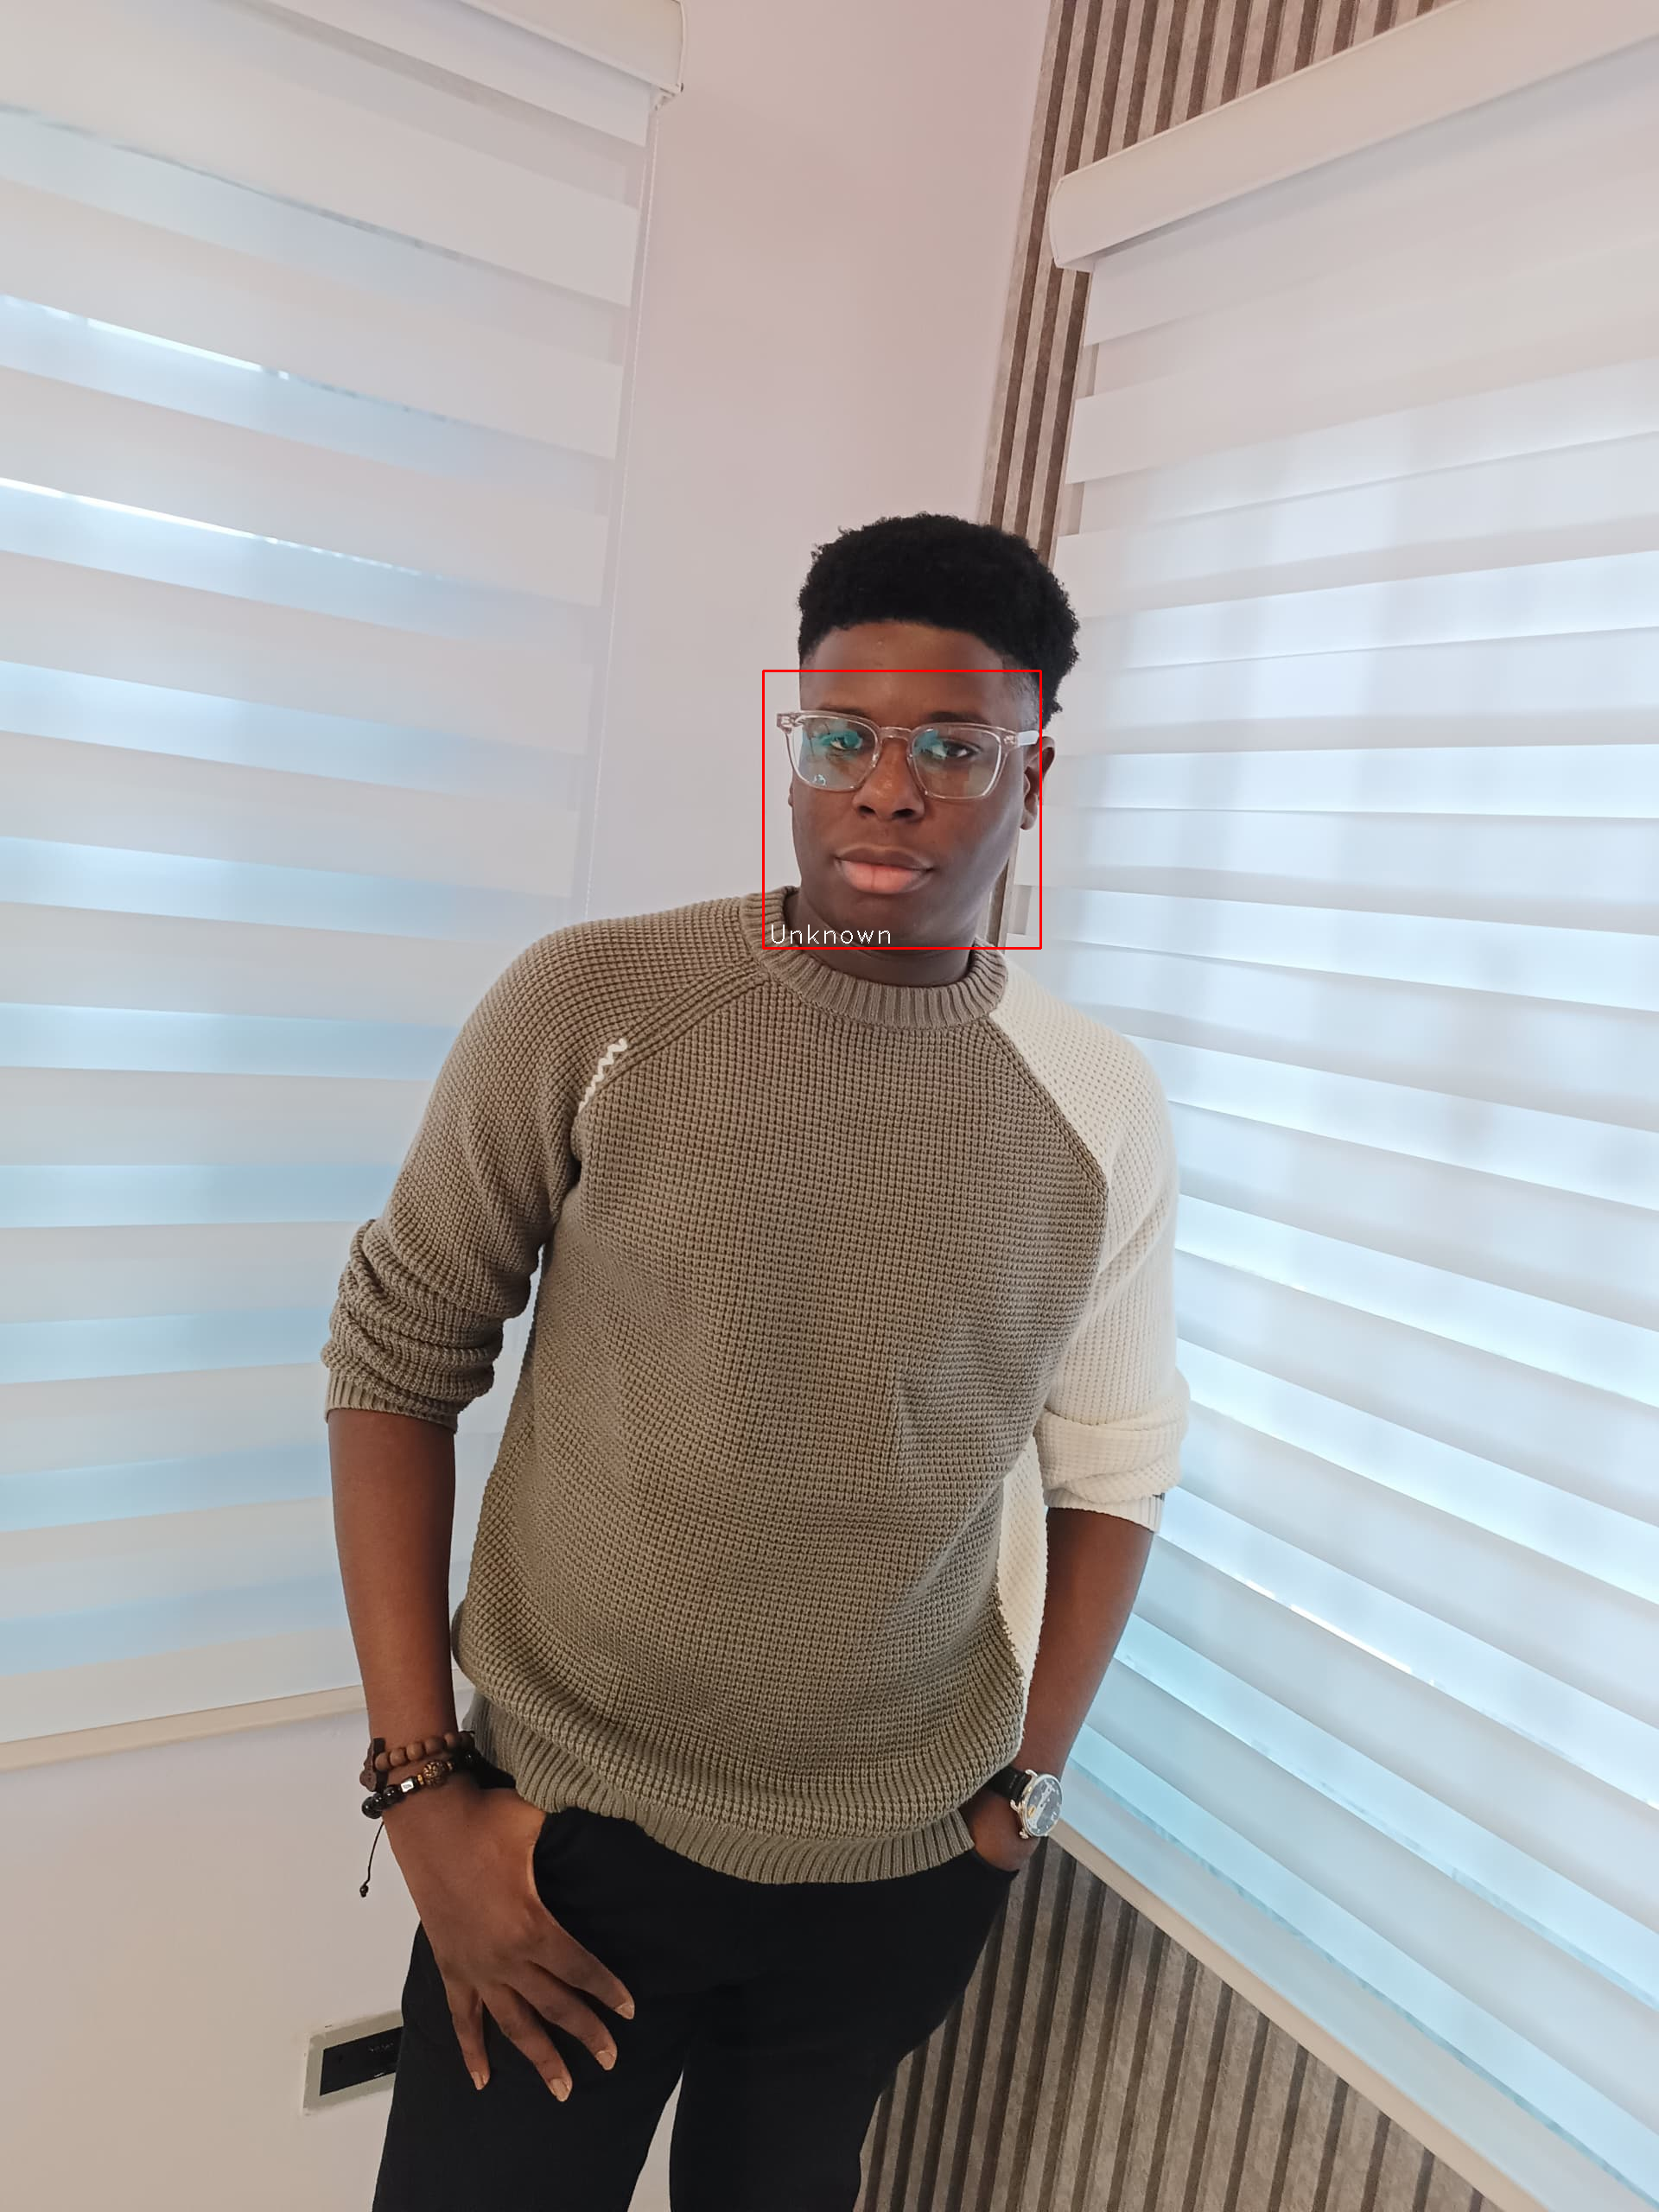

In [24]:
import face_recognition

#unknown
img2 = cv2.imread("/content/testimony.jpeg")

# Load known face encodings (replace with your actual paths)
known_image = face_recognition.load_image_file("/content/dumebi.jpeg")
known_face_encoding = face_recognition.face_encodings(known_image)[0]

rgb_img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# Find faces and encodings in the uploaded image
face_locations = face_recognition.face_locations(rgb_img)
face_encodings = face_recognition.face_encodings(rgb_img, face_locations)

face_names = []
for face_encoding in face_encodings:
  # Compare face encoding with known faces
  matches = face_recognition.compare_faces([known_face_encoding], face_encoding)
  name = "Unknown"
  if True in matches:
    name = "Dumebi"  # Replace with the actual name
  face_names.append(name)

# Draw rectangles and labels for recognized faces
for (top, right, bottom, left), name in zip(face_locations, face_names):
  cv2.rectangle(img2, (left, top), (right, bottom), (0, 0, 255), 2)
  font = cv2.FONT_HERSHEY_DUPLEX
  cv2.putText(img2, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

# Display the resulting img2 with recognized faces
cv2_imshow(img2)


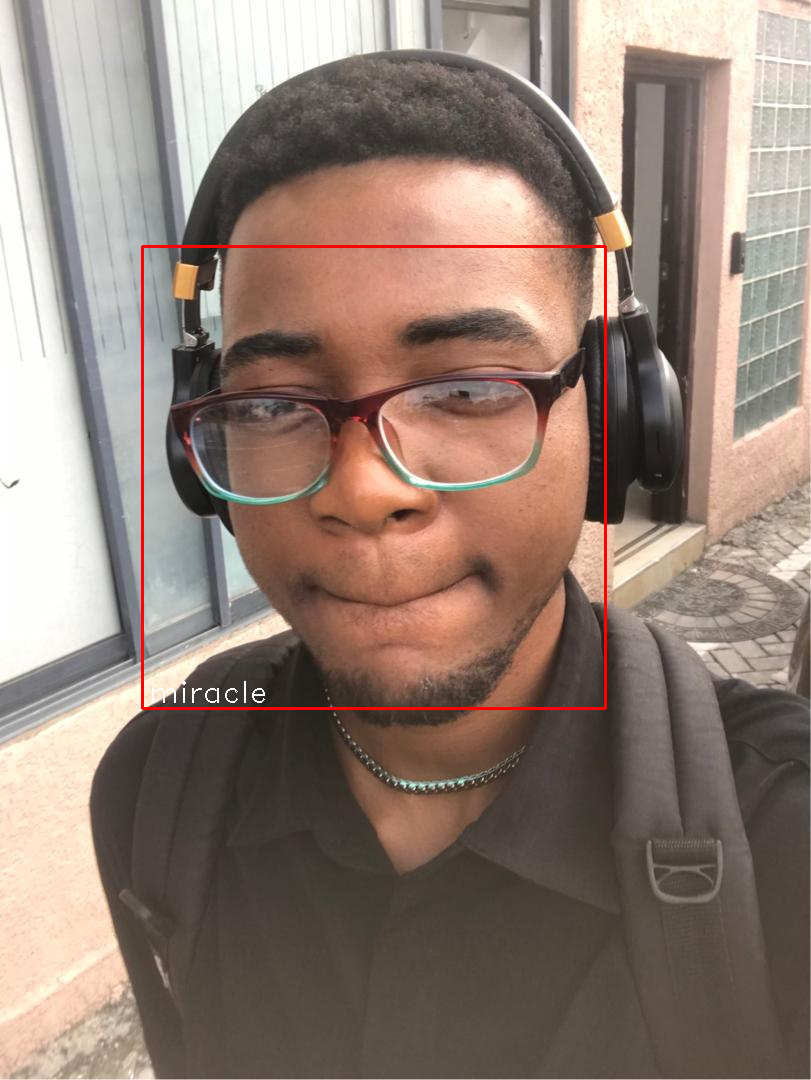

In [34]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow
import os

# Path to the directory containing known face images
known_faces_dir = "/content/known_faces"  # Replace with your actual directory path

# Load known face encodings and names
known_face_encodings = []
known_face_names = []

for filename in os.listdir(known_faces_dir):
  # Load image
  known_image = face_recognition.load_image_file(os.path.join(known_faces_dir, filename))
  # Get name from filename (assuming name is before the dot extension)
  name = os.path.splitext(filename)[0]  # Split filename and get the name part

  # Get face encoding
  known_face_encoding = face_recognition.face_encodings(known_image)[0]

  # Add encoding and name to lists
  known_face_encodings.append(known_face_encoding)
  known_face_names.append(name)


# Load the unknown image #test image basically
unknown_image = cv2.imread("/content/miracle2.jpeg")
rgb_img = cv2.cvtColor(unknown_image, cv2.COLOR_BGR2RGB)

# Find faces and encodings in the unknown image
face_locations = face_recognition.face_locations(rgb_img)
face_encodings = face_recognition.face_encodings(rgb_img, face_locations)

face_names = []
for face_encoding in face_encodings:
  # Compare face encoding with all known faces
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
  name = "Unknown"

  # If there's a match, get the name from the corresponding known_face_names list
  if True in matches:
    first_match_index = matches.index(True)
    name = known_face_names[first_match_index]

  face_names.append(name)

# Draw rectangles and labels for recognized faces
for (top, right, bottom, left), name in zip(face_locations, face_names):
  cv2.rectangle(unknown_image, (left, top), (right, bottom), (0, 0, 255), 2)
  font = cv2.FONT_HERSHEY_DUPLEX
  cv2.putText(unknown_image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

# Display the resulting image with recognized faces
cv2_imshow(unknown_image)


In [31]:
known_face_encodings

[array([-0.14225933,  0.03361532,  0.07282695, -0.0998434 , -0.05194806,
        -0.08619614,  0.01869414, -0.13229316,  0.15422241, -0.13899688,
         0.26615033, -0.11286106, -0.12450055, -0.1213463 ,  0.08208307,
         0.20140392, -0.14815333, -0.20719405, -0.03519102, -0.1106693 ,
         0.00422542, -0.04147703, -0.03465667,  0.19587675, -0.19594646,
        -0.25970855, -0.09161273, -0.15012467, -0.01576047, -0.04632753,
        -0.00171603,  0.09384421, -0.22923473,  0.00128503,  0.02039739,
         0.11315944,  0.02458107, -0.05867718,  0.14258347,  0.01797992,
        -0.20916173, -0.0567718 ,  0.02685177,  0.23140259,  0.14045325,
        -0.04116878,  0.00255799,  0.01268864,  0.0839156 , -0.16304   ,
         0.03475669,  0.06432731,  0.09090716,  0.02276582,  0.01010871,
        -0.20433354, -0.03365371,  0.10572635, -0.19431704,  0.02176132,
        -0.03543551, -0.12798627, -0.10253775, -0.11361276,  0.29754838,
         0.18216029, -0.16430077, -0.112359  ,  0.2